In [18]:
%config Completer.use_jedi = False

In [10]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [11]:
local_zip = '../datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../datasets/tmp')
zip_ref.close()

base_dir = '../datasets/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

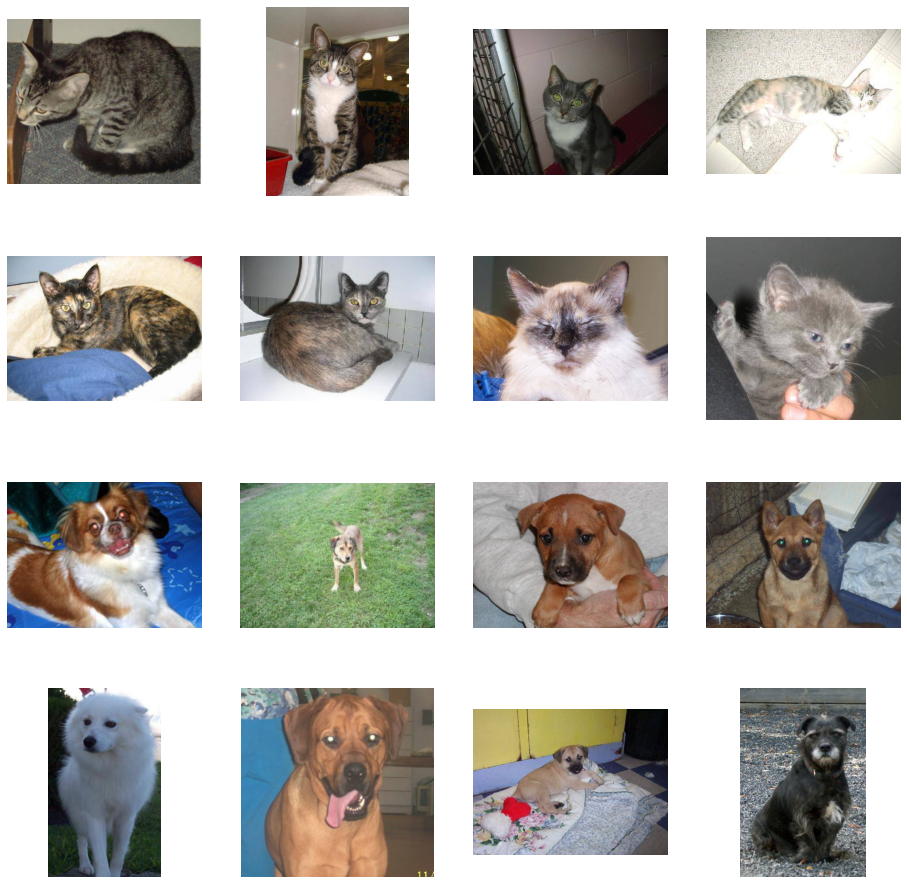

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [14]:
# Training and validation datasets
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# Loading the Base Model
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [16]:
# Como no tenemos q mejorar todas las capas, las hacemos non_trainable
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Compile and Fit
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 195s 2s/step - loss: 1.0238 - acc: 0.5965 - val_loss: 0.3662 - val_acc: 0.8240
Epoch 2/10
100/100 [==============================] - 198s 2s/step - loss: 0.4995 - acc: 0.7635 - val_loss: 0.2549 - val_acc: 0.9010
Epoch 3/10
100/100 [==============================] - 199s 2s/step - loss: 0.3952 - acc: 0.8318 - val_loss: 0.3208 - val_acc: 0.8540
Epoch 4/10
100/100 [==============================] - 198s 2s/step - loss: 0.4146 - acc: 0.8207 - val_loss: 0.3246 - val_acc: 0.8620
Epoch 5/10
100/100 [==============================] - 198s 2s/step - loss: 0.3931 - acc: 0.8196 - val_loss: 0.2054 - val_acc: 0.9170
Epoch 6/10
100/100 [==============================] - 198s 2s/step - loss: 0.3599 - acc: 0.8419 - val_loss: 0.2031 - val_acc: 0.9220
Epoch 7/10
100/100 [==============================] - 198s 2s/step - loss: 0.3696 - acc: 0.8380 - val_loss: 0.2170 - val_acc: 0.9080
Epoch 8/10
100/100 [==============================] - 198s 2s/step - 

In [11]:
################################### INCEPTION ###################################

In [12]:
# Step 1: Data Augmentation

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [13]:
# Step 2: Training and Validation Generators

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Step 3: Loading the Base Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 6s 0us/step


In [15]:
# Step 4: Compile and Fit

for layer in base_model.layers:
    layer.trainable = False

In [16]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [17]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

/home/joaquinfunes/miniconda3/envs/tesis/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 44s 412ms/step - loss: 3.4205 - acc: 0.7806 - val_loss: 0.4467 - val_acc: 0.8890
Epoch 2/10
100/100 [==============================] - 43s 426ms/step - loss: 0.4273 - acc: 0.8867 - val_loss: 0.1490 - val_acc: 0.9540
Epoch 3/10
100/100 [==============================] - 41s 410ms/step - loss: 0.4852 - acc: 0.8806 - val_loss: 0.1669 - val_acc: 0.9470
Epoch 4/10
100/100 [==============================] - 40s 403ms/step - loss: 0.3409 - acc: 0.9067 - val_loss: 0.1916 - val_acc: 0.9480
Epoch 5/10
100/100 [==============================] - 42s 417ms/step - loss: 0.3461 - acc: 0.9041 - val_loss: 0.1284 - val_acc: 0.9620
Epoch 6/10
100/100 [==============================] - 41s 409ms/step - loss: 0.3153 - acc: 0.9163 - val_loss: 0.1633 - val_acc: 0.9560
Epoch 7/10
100/100 [==============================] - 41s 407ms/step - loss: 0.2540 - acc: 0.9206 - val_loss: 1.1820 - val_acc: 0.8480
Epoch 8/10
100/100 [==============================] - 4